## Name - Vaibhav R. Gudulkar

# Assignment - Decision Tree (comany_data.csv)

In [2]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
# importing dataset

company = pd.read_csv('Company_Data.csv')
company.sample(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
230,5.16,115,60,0,119,114,Bad,38,14,No,No
8,6.54,132,110,0,108,124,Medium,76,10,No,No
145,8.77,144,63,11,27,117,Medium,47,17,Yes,Yes
118,7.57,112,88,2,243,99,Medium,62,11,Yes,Yes
124,8.87,131,113,0,181,120,Good,63,14,Yes,No


In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
# Categorising Sales based on 'High'(>=7.5) and 'low'(<7.5)

sales_val=[]
for value in company['Sales']:
    if value >= 7.5:
        sales_val.append('High')
    else:
        sales_val.append('Low')
company['Sales_category']=sales_val

In [9]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [10]:
#label encoding for categorical columns

label_encoding = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoding.fit_transform(company['ShelveLoc'])
company['Urban']= label_encoding.fit_transform(company['Urban'])
company['US']= label_encoding.fit_transform(company['US'])

In [11]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Low
397,7.41,162,26,12,368,159,2,40,18,1,1,Low
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


In [13]:
# Dropping sales column

company_data= company.drop(columns='Sales')

In [14]:
company_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,0,42,17,1,1,High
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,High
3,117,100,4,466,97,2,55,14,1,1,Low
4,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,High
396,139,23,3,37,120,2,55,11,0,1,Low
397,162,26,12,368,159,2,40,18,1,1,Low
398,100,79,7,284,95,0,50,12,1,1,Low


In [15]:
# Defining Dependent & Independent variable


x= company_data.iloc[:,0:10]
y=company_data['Sales_category']

In [16]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [17]:
y

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales_category, Length: 400, dtype: object

In [18]:
#Unique Categories

company_data.Sales_category.unique()

array(['High', 'Low'], dtype=object)

In [19]:
# Count of unique categories

company_data.Sales_category.value_counts()

Low     201
High    199
Name: Sales_category, dtype: int64

In [20]:
# Splitting into Train and Test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3, random_state= 40)

### Decision Tree Classifier (C 5.0) using Entropy criteria

In [21]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=40)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=40)

Text(0.5, 1.0, ' Decision tree using Entropy (CART)')

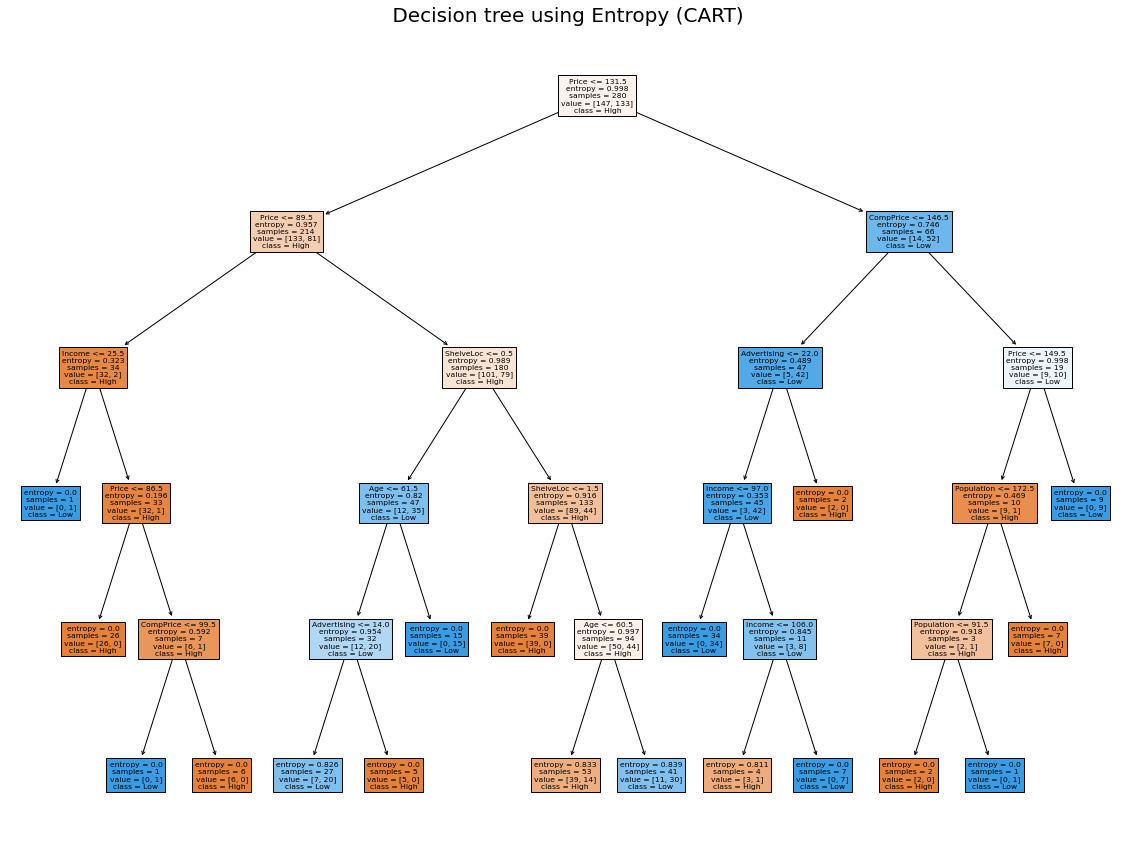

In [24]:
# Visualizing our Decision Tree

figure= plt.figure(figsize=(20,15))
tree.plot_tree(model, 
               feature_names=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'], 
               class_names=['High','Low'],
               filled=True);
plt.title(' Decision tree using Entropy (CART)', fontsize=20)

In [23]:
# Predicting on test data

pred = model.predict(x_test)
pd.Series(pred).value_counts()

Low     65
High    55
dtype: int64

In [25]:
pred

array(['Low', 'Low', 'Low', 'High', 'Low', 'High', 'High', 'High', 'High',
       'High', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'High', 'High', 'High', 'High', 'Low', 'High',
       'High', 'Low', 'High', 'High', 'High', 'Low', 'High', 'High',
       'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'High', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low',
       'Low', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'High',
       'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'High',
       'Low', 'High', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'Low',
       'Low', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'High', 'Low', 'Low', 'High', 'High', 'High', 'High', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'Low', 'High', 'High', 'High'], dtype=

In [26]:
# Cross Table

pd.crosstab(y_test,pred)

col_0,High,Low
Sales_category,,
High,35,17
Low,20,48


In [27]:
(35+48)/(35+17+20+48)

0.6916666666666667

In [28]:
# Accuracy

np.mean(pred==y_test)

0.6916666666666667

### We get 69% Accuracy

## Building Decision Tree Classifier (CART) using Gini Criteria

In [29]:
model1 =DecisionTreeClassifier(criterion='gini', max_depth=5)
model1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

Text(0.5, 1.0, 'Decision tree using Gini impurity(CART)')

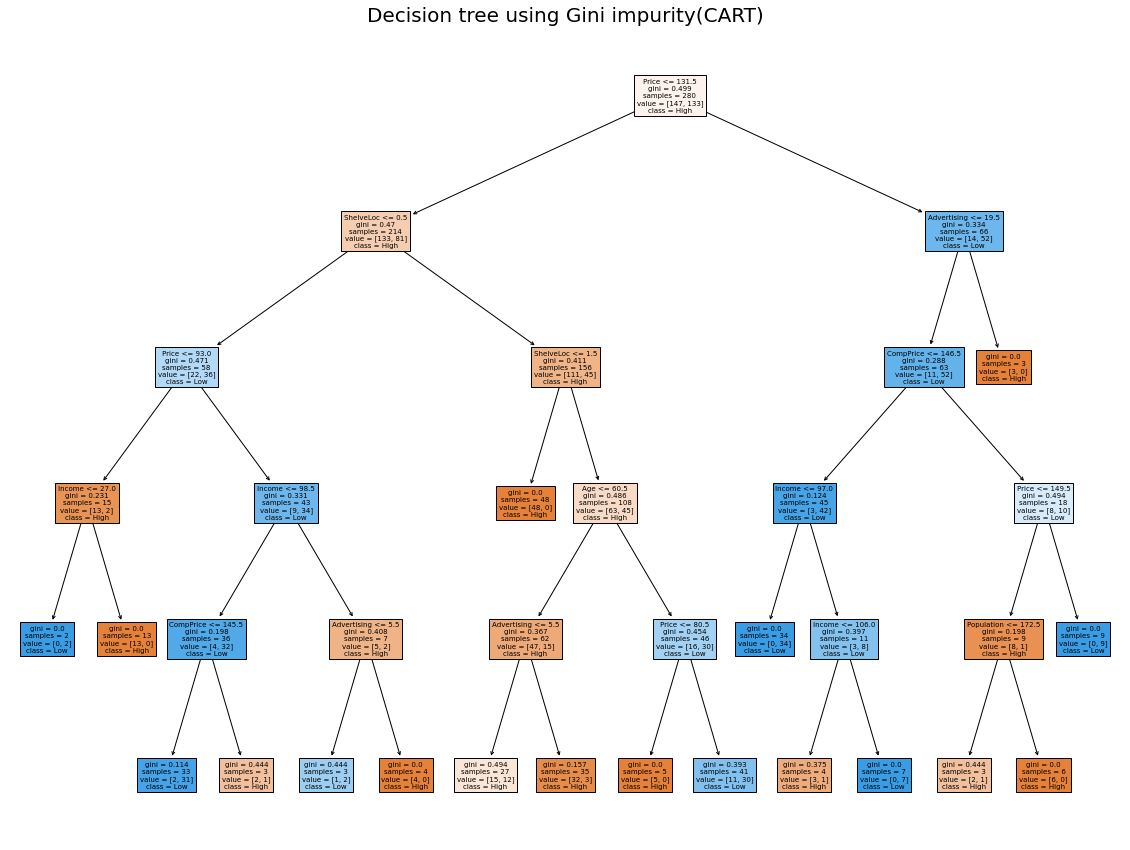

In [30]:
#Visualizing Decision Tree

figure= plt.figure( figsize=(20,15))
tree.plot_tree(model1,feature_names=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'], 
               class_names=['High','Low'],
               filled=True);
plt.title('Decision tree using Gini impurity(CART)', fontsize=20)

In [31]:
# Predicting on test data

pred_gini =model1.predict(x_test)
pd.Series(pred_gini).value_counts()

Low     62
High    58
dtype: int64

In [32]:
#predicting on test data
pred_gini =model1.predict(x_test)
pd.Series(pred_gini).value_counts()

Low     62
High    58
dtype: int64

In [33]:
# Accuracy

np.mean(pred_gini==y_test)

0.6666666666666666

In [34]:
# Cross Table

pd.crosstab(y_test,pred_gini)

col_0,High,Low
Sales_category,,
High,35,17
Low,23,45


In [35]:
(35+45)/(35+17+23+45)

0.6666666666666666

## We get 66% Accuracy